[Data Soucre](https://github.com/KeithGalli/Pandas-Data-Science-Tasks/tree/master/SalesAnalysis/Sales_Data)

In [1]:
import pandas as pd
import os #to read all files from the directory

## Task1. Merge 12 months of sales data into a single file

In [ ]:
#show the current directory
pwd
#or
#os.getcwd()

In [7]:
#change the directory
#os.chdir('\tmp')

In [2]:
files = [file for file in os.listdir('.\Sales_Data')]
for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [3]:
## Approach 1
all_month_data = pd.DataFrame()

#create a for loop to merge all files
for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_month_data = pd.concat([all_month_data, df])
all_month_data.to_csv('all_month_data.csv', index=False)

In [4]:
all_month_data.shape

(186849, 6)

In [4]:
## Approach 2
df_concat = pd.concat([pd.read_csv("./Sales_Data/"+file) for file in files], ignore_index=True)
df_concat.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186844,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186845,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186846,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186847,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186848,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


In [5]:
df_concat.to_csv('df_concat.csv', index=False)

### Read in updated data

In [5]:
all_data = pd.read_csv('all_month_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001"


In [6]:
all_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186844,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186845,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186846,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186847,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186848,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


## Question1. What was the best month for sales? How much was earned that month?

### Task2. Augment data with additional columns: Add month column
#### Clean data
#### (1) Drop nan

In [7]:
all_data.shape

(186849, 6)

In [8]:
all_data['Order Date'].isnull().sum()

544

In [23]:
all_data.isnull().sum()

Order ID            544
Product             544
Quantity Ordered    544
Price Each          544
Order Date          544
Purchase Address    544
Month               544
dtype: int64

In [9]:
#all_data[all_data.isnull()]#this will just turn all rows into nan
all_data[all_data.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
355,NaN,NaN,NaN,NaN,NaN,NaN
734,NaN,NaN,NaN,NaN,NaN,NaN
1432,NaN,NaN,NaN,NaN,NaN,NaN
1552,NaN,NaN,NaN,NaN,NaN,NaN
1570,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185175,NaN,NaN,NaN,NaN,NaN,NaN
185437,NaN,NaN,NaN,NaN,NaN,NaN
186041,NaN,NaN,NaN,NaN,NaN,NaN
186547,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#drop rows of nan
all_data.dropna(how='all', inplace=True) #how='any' will drop rows as long as it has one column as null
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [12]:
all_data.shape

(186305, 6)

#### (2) Find 'Order Date' value and delet it

In [11]:
#temp = all_data[all_data['Order Date'].str[0:2]=='Or']
#temp#355rows
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']
all_data.shape

(185950, 6)

#### Add month column

In [12]:
#add month column
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
186844,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186845,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186846,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186847,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09
186848,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016",09


In [13]:
all_data['Month'].unique()

array(['4/', '5/', '08', '09', '12', '01', '02', '03', '07', '06', '04',
       '05', '11', '10'], dtype=object)

In [14]:
#remove / from Month
all_data['Month'] = all_data['Month'].str.replace('[/]', '')
all_data['Month'].unique()

C:\Users\IgnacioKleinmanRuiz\AppData\Local\Temp\ipykernel_7192\2519869776.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  all_data['Month'] = all_data['Month'].str.replace('[/]', '')


array(['4', '5', '08', '09', '12', '01', '02', '03', '07', '06', '04',
       '05', '11', '10'], dtype=object)

In [16]:
all_data['Month'] = all_data['Month'].replace('4', '04')
all_data['Month'] = all_data['Month'].replace('5', '05')
all_data['Month'].unique()

array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

In [17]:
#convert Month to integer
all_data['Month'] = all_data['Month'].astype('int32')
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186848
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  int32 
dtypes: int32(1), object(6)
memory usage: 10.6+ MB


#### Convert Quantity Ordered and Price Each to integer and numeric
we could use pd.to_numeric() for both

In [18]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int64')
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186848
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  int64 
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  int32 
dtypes: int32(1), int64(1), object(5)
memory usage: 10.6+ MB


In [19]:
all_data['Price Each'] = all_data['Price Each'].astype('float')
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186848
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int32  
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 10.6+ MB


#### Add sales revenue

In [20]:
all_data['Revenue'] = all_data['Price Each'] * all_data['Quantity Ordered']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [27]:
all_data.groupby('Month').sum()['Revenue']

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Revenue, dtype: float64

In [28]:
r = all_data.groupby('Month').sum(); r

,Quantity Ordered,Price Each,Revenue
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


December has the most sales, $4,613,443.34 was earned in that month.

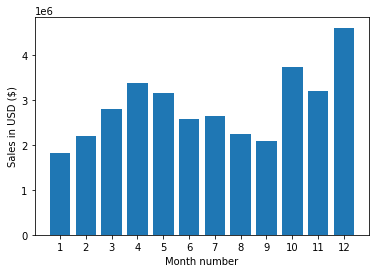

In [30]:
import matplotlib.pyplot as plt

months = range(1,13)#13 is exclusive
plt.bar(months, r['Revenue'])#month for x axis, r for y axis

#make the plots nicer
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

## Question2. What city has the most amount of sales?
### Task4: Split Address into separate columns:

In [53]:
# Approach1:
#all_data.drop(columns=['City', 'columns'], inplace=True)
#all_data['Address'] = all_data['Purchase Address'].str.split(',', expand=True)[0]
all_data['column'] = all_data['Purchase Address'].str.split(',', expand=True)[1]
#all_data['State_Zipcode'] = all_data['Purchase Address'].str.split(',', expand=True)[2]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue,column
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
2,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [21]:
#Approach 2:use apply() lambda x: f string
def get_city(address):
    return address.split(',')[1]

#as there might have same city name but in different state, we will add state info to the city column
def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
#or #.apply(lambda x: get_city(x) + ' (' + get_state(x) + ')')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue,City
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [39]:
all_data.City.unique()

array([' Dallas', ' Boston', ' Los Angeles', ' San Francisco', ' Seattle',
       ' Atlanta', ' New York City', ' Portland', ' Austin'], dtype=object)

In [22]:
r1 = all_data.groupby(['City']).sum()
r1.sort_values("Revenue", axis = 0, ascending = False)

,Quantity Ordered,Price Each,Month,Revenue
City,,,,
San Francisco (CA),50239,8211461.74,315520,8262203.91
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Boston (MA),22528,3637409.77,141112,3661642.01
Atlanta (GA),16602,2779908.20,104794,2795498.58
Dallas (TX),16730,2752627.82,104620,2767975.40
Seattle (WA),16553,2733296.01,104941,2747755.48
Portland (OR),11303,1860558.22,70621,1870732.34
Austin (TX),11153,1809873.61,69829,1819581.75


San Francisco has the most sales, creating $8,262,203.91 revenue.

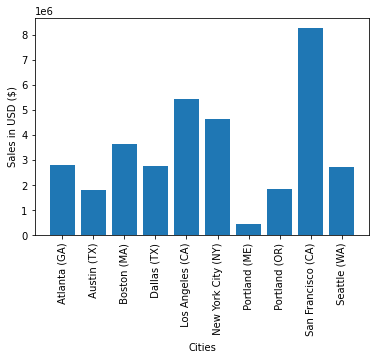

In [24]:
import matplotlib.pyplot as plt
#cities = all_data['City'].unique()#r1['City'] wouldn't work, need to .reset_index() first
#cities = ['Dallas', 'Boston', 'Los Angeles', 'San Francisco', 'Seattle', 'Atlanta', 'New York City', 'Portland', 'Austin']
#these will bring the wrong order of city

cities = [city for city, df in all_data.groupby('City')]
#if extract city get unique values by City column, which is converted to index after aggregate sum.

plt.bar(cities, r1['Revenue'])

plt.xticks(cities, rotation='vertical') #rotation=45, size=8
plt.ylabel('Sales in USD ($)')
plt.xlabel('Cities')
plt.show()

## Question 3: What time should we display advertisements to maximize the likelihood of purchases

In [25]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [27]:
all_data['Order Date'].info()

<class 'pandas.core.series.Series'>
Int64Index: 185950 entries, 0 to 186848
Series name: Order Date
Non-Null Count   Dtype         
--------------   -----         
185950 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.8 MB


In [28]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [30]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [47]:
t = all_data.groupby(['Hour']).count() #count the number of order 
t.reset_index()

,Hour,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue,City,Minute
0,0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,3,831,831,831,831,831,831,831,831,831,831
4,4,854,854,854,854,854,854,854,854,854,854
5,5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256
9,9,8748,8748,8748,8748,8748,8748,8748,8748,8748,8748


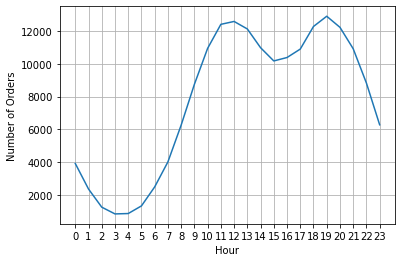

In [50]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, t['Order ID'])
#plt.plot(hours, all_data.groupby(['Hour']).count())#somehow the way doesn't work for me
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

12 pm and 19 is the best time for advertisting.
## Question4. What products are most often sold together?
### Count the unique pairs:
#### (1) Join the product to the same column

In [62]:
#examine duplicated Order ID  
df = all_data[all_data['Order ID'].duplicated(keep=False)]#keep=False is to keep every duplicates    
#df.head(20)
df['Product_list'] = df.groupby('Order ID')['Product'].transform(lambda x: ';'.join(x))
#df.head()

#as there's duplicated row for the same order id with different product, we will keep only order id and product_list, and drop all duplicates
df = df[['Order ID', 'Product_list']].drop_duplicates()
df.head()

C:\Users\IgnacioKleinmanRuiz\AppData\Local\Temp\ipykernel_7192\3331443632.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Product_list'] = df.groupby('Order ID')['Product'].transform(lambda x: ';'.join(x))


,Order ID,Product_list
2,176560,Google Phone;Wired Headphones
17,176574,Google Phone;USB-C Charging Cable
29,176585,Bose SoundSport Headphones;Bose SoundSport Hea...
31,176586,AAA Batteries (4-pack);Google Phone
118,176672,Lightning Charging Cable;USB-C Charging Cable


#### (2) Count unique pairs
Ref: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

In [70]:
from itertools import combinations
from collections import Counter

In [71]:
count = Counter()

for row in df['Product_list']:
    row_list = row.split(';')
    count.update(Counter(combinations(row_list, 2)))#take a pair

#print the most common 10
for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


## Question5: What product sold the most? Why do you think it did? 

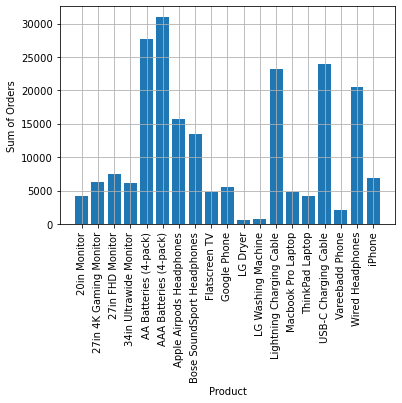

In [73]:
product_group = all_data.groupby(['Product'])
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)

plt.xticks(products, rotation='vertical')
plt.xlabel('Product')
plt.ylabel('Sum of Orders')
plt.grid()
plt.show()

In [74]:
prices = all_data.groupby(['Product']).mean()['Price Each']
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

Ref: [how to add second yaxis to existing matplotlib plot](https://www.geeksforgeeks.org/how-to-add-a-y-axis-label-to-the-secondary-y-axis-in-matplotlib/) 

C:\Users\IgnacioKleinmanRuiz\AppData\Local\Temp\ipykernel_7192\2604058926.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)
C:\Users\IgnacioKleinmanRuiz\AppData\Local\Temp\ipykernel_7192\2604058926.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


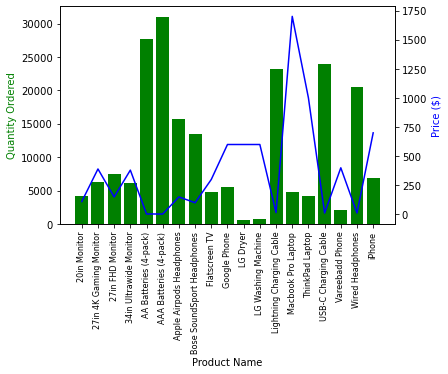

In [75]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

fig.show()

Price high, lower quantity ordered.

Reference: [Keith Galli](https://github.com/KeithGalli/Pandas-Data-Science-Tasks)